# Classification model to predict whether a person makes over 50k a year

## Problrm Statement:
> - This Classification model helps to predict whether a person makes over $50k a year or not
> - Pipeline of this Model
            1. Reading data from the csv file.
            2. Add column names to the dataset.
            3. Check for null values, if there handle them.
            4. Encoding Data.
            5. Train and test the data.
            6. Apply to each model.

In [81]:
### importing required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
pd.set_option('display.max_columns',100)

In [83]:
### Reading data from the .csv file
df = pd.read_csv('adult.csv',header=None)

In [84]:
# Display top 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [85]:
#Display shape of the dataframe
df.shape

(32561, 15)

In [86]:
# Display the size of the dataframe(rows * columns)
df.size

488415

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Adding column names to the dataset.

In [88]:
df.columns = ['Age','Workclass','Fnlwgt', 'Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [89]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [91]:
# Here '?' has no meaning so we re changing '?' to 'Others'
df['Workclass'] = df['Workclass'].replace(' ?', 'Others')

In [92]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Others                1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

#### Succcesfully changed '?' in Workclass to 'Others'

In [93]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [94]:
# Here '?' has no meaning so we re changing '?' to 'Others'
df['occupation'] = df['occupation'].replace(' ?', 'Others')

In [95]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Others                1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

#### Succcesfully changed '?' in Occupation to 'Others'

## Visualizing required Categorical Columns

<AxesSubplot:xlabel='count', ylabel='Workclass'>

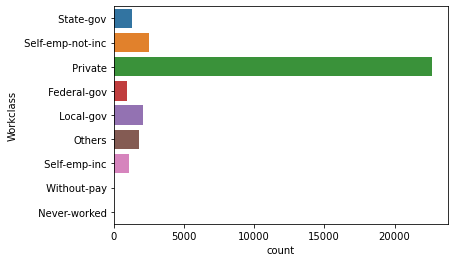

In [96]:
# Plotting Graph for Workclass
sns.countplot(y=df['Workclass'])

<AxesSubplot:xlabel='count', ylabel='marital_status'>

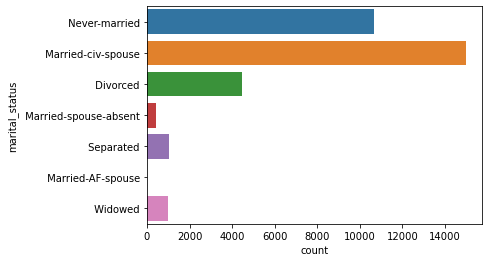

In [97]:
# Plotting Graph for marital_status
sns.countplot(y=df['marital_status'])

<AxesSubplot:xlabel='count', ylabel='relationship'>

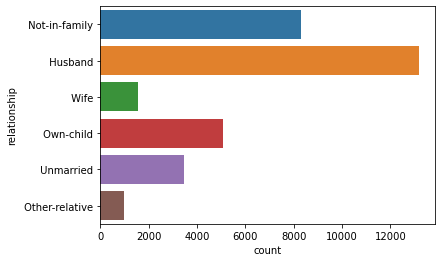

In [98]:
# Plotting Graph for relationship
sns.countplot(y=df['relationship'])

In [99]:
### Checking For null values
df.isnull().sum().sum()

0

### There are no Null Values.

### Replacing the data type of Target column(Income), So that the job will get done easily.

In [100]:
df['income'] = df['income'].replace([' <=50K', ' >50K'], ['0', '1'])

### Encoding is used to change the data from Categorical to Numerical.

In [101]:
df2=df[['Age','Workclass','marital_status','education_num','race','occupation','capital_gain','capital_loss','hours_per_week']]

In [102]:
# dummie encoding the categorical columns
df2=pd.get_dummies(df2,drop_first=True)
df2.head()

,Age,education_num,capital_gain,capital_loss,hours_per_week,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Workclass_Others,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Others
0,39,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,38,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [103]:
df2.head()

,Age,education_num,capital_gain,capital_loss,hours_per_week,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Workclass_Others,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Others
0,39,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,38,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Importing required modules for all models.


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [105]:
# Assigning Dependemt features and Independent features
x=df2
y = df['income']

In [106]:
# Lets consider 75 percent of our data into trainning data and 25 percent to test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=42)

## Logistic Regression

In [107]:
#Instantiating the object
lr = LogisticRegression()

In [108]:
# Fitting the model
lr.fit(x_train,y_train)

C:\Users\T.VASUDEVA REDDY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
# Applying prediction
pred = lr.predict(x_test)
#pred=pred.astype('int')

In [110]:
# Printing accuracy score
print('Logistic Regression:',accuracy_score(y_test,pred))

Logistic Regression: 0.844490848790075


In [111]:
# Printig confusion matrix
confusion_matrix(y_test, pred)

array([[5765,  449],
       [ 817, 1110]], dtype=int64)

In [112]:
# Getting Classification report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6214
           1       0.71      0.58      0.64      1927

    accuracy                           0.84      8141
   macro avg       0.79      0.75      0.77      8141
weighted avg       0.84      0.84      0.84      8141



In [113]:
# Changimg datatype of both y_test and pred
pred=pred.astype('int')
y_test = y_test.astype('int')
print("Precison is: ",precision_score(y_test.values,pred))
print("Recall is: ",recall_score(y_test.values,pred))
print("F1-Score is: ",f1_score(y_test.values,pred))

Precison is:  0.7119948685054522
Recall is:  0.5760249091852621
F1-Score is:  0.6368330464716007


In [114]:
# Percentage of misclassification in LogisticRegression
m = 1-accuracy_score(y_test,pred)
print('Percentage of misclassification: ', m)

Percentage of misclassification:  0.15550915120992503


### Decision Tree 

In [115]:
# Instantiating the object
clf = DecisionTreeClassifier(random_state=42)

In [116]:
# Fitting the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [117]:
# Applying prediction
pred=clf.predict(x_test)
pred=pred.astype('int')
# Printing accuracy score
print('Decision Tree Classifier:',accuracy_score(y_test, pred))

Decision Tree Classifier: 0.822871883061049


In [118]:
# Printig confusion matrix
confusion_matrix(y_test, pred)

array([[5504,  710],
       [ 732, 1195]], dtype=int64)

In [119]:
# Getting Classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6214
           1       0.63      0.62      0.62      1927

    accuracy                           0.82      8141
   macro avg       0.75      0.75      0.75      8141
weighted avg       0.82      0.82      0.82      8141



In [120]:
print("Precison is: ",precision_score(y_test.values,pred))
print("Recall is: ",recall_score(y_test.values,pred))
print("F1-Score is: ",f1_score(y_test.values,pred))

Precison is:  0.6272965879265092
Recall is:  0.6201349247535028
F1-Score is:  0.623695198329854


In [121]:
# Percentage of misclassification in DecisionTreeClassifier
m = 1-accuracy_score(y_test,pred)
print('Percentage of misclassification: ', m)

Percentage of misclassification:  0.17712811693895103


### Random Forest Classifier

In [122]:
# Instantiating the object
RF = RandomForestClassifier(n_estimators = 100)

In [123]:
# Fitting the model
RF.fit(x_train, y_train)

RandomForestClassifier()

In [124]:
# Applying prediction
pred=RF.predict(x_test)
pred=pred.astype('int')
# Printing accuracy score
print('Random Forest:',accuracy_score(y_test, pred))

Random Forest: 0.8495270851246776


In [125]:
# Printig confusion matrix
confusion_matrix(y_test, pred)

array([[5714,  500],
       [ 725, 1202]], dtype=int64)

In [126]:
# Getting Classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6214
           1       0.71      0.62      0.66      1927

    accuracy                           0.85      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.84      0.85      0.85      8141



In [127]:
print("Precison is: ",precision_score(y_test.values,pred))
print("Recall is: ",recall_score(y_test.values,pred))
print("F1-Score is: ",f1_score(y_test.values,pred))

Precison is:  0.7062279670975323
Recall is:  0.6237675142708874
F1-Score is:  0.662441443923946


In [128]:
# Percentage of misclassification in Random Forest
m = 1-accuracy_score(y_test,pred)
print('Percentage of misclassification: ', m)

Percentage of misclassification:  0.15047291487532244


### K Nearest Neighbors

In [129]:
# Instantiating the object
knn = KNeighborsClassifier()

In [130]:
# Instantiating the object and assigning nearest k value as 18.
knn = KNeighborsClassifier(n_neighbors=18)

In [131]:
# Fitting the model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [132]:
# Applying prediction
pred = knn.predict(x_test)
pred=pred.astype('int')

In [133]:
# Printing accuracy score
print("KNearest neighbour: ", accuracy_score(y_test, pred))

KNearest neighbour:  0.850141260287434


In [134]:
# Printing Precison Score, Recall Score and F1-Score
print("Precison is: ",precision_score(y_test.values,pred))
print("Recall is: ",recall_score(y_test.values,pred))
print("F1-Score is: ",f1_score(y_test.values,pred))

Precison is:  0.7484188334504568
Recall is:  0.5526725480020758
F1-Score is:  0.6358208955223881


In [135]:
# Percentage of misclassification in K Nearest Neighbors
m = 1-accuracy_score(y_test,pred)
print('Percentage of misclassification: ', m)

Percentage of misclassification:  0.14985873971256602


### Support Vector Machine

In [136]:
# Instantiating the object and linearly separating the data.
classifier = SVC(kernel="linear",random_state=42)

In [63]:
# Fitting the model
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [64]:
# Applying prediction
pred = classifier.predict(x_test)
pred=pred.astype('int')
# Printing accuracy score
print("SVC Classifier: ", accuracy_score(y_test, pred))

SVC Classifier:  0.8349097162510748


In [65]:
# Printing Precison Score, Recall Score and F1-Score
print("Precison is: ",precision_score(y_test.values,pred))
print("Recall is: ",recall_score(y_test.values,pred))
print("F1-Score is: ",f1_score(y_test.values,pred))

Precison is:  0.6634885025238362
Recall is:  0.6139076284379865
F1-Score is:  0.6377358490566037


In [66]:
# Percentage of misclassification in SVM
m = 1-accuracy_score(y_test,pred)
print('Percentage of misclassification: ', m)

Percentage of misclassification:  0.1650902837489252


### Changing Target Column to it's original Data type.

In [137]:
df['income'] = df['income'].replace(['0', '1'], [' <=50K', ' >50K'])

# Conclusion
> - After Cleaning and Filtering Data each model gives the Accuracy score as below
            1. Logistic Regression    - 0.844490848790075
            2. Decision Tree          - 0.822871883061049
            3. Random Forest          - 0.8479302297015109
            4. K Nearest Neighbors    - 0.850141260287434
            5. Support Vector Machine - 0.8349097162510748